In [8]:
#Code From Josh Pohl 
# Dependencies
#Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
pop_url = "https://api.census.gov/data/2019/pep/charagegroups?get=NAME,POP&for=county:*&in=state:34&key=52e4b71218eb4d492e49c7dcde830174d23a8db9"
age_sex_url = "https://api.census.gov/data/2019/pep/charagegroups?get=NAME,POP,SEX,AGEGROUP&for=county:*&in=state:34&key=52e4b71218eb4d492e49c7dcde830174d23a8db9"


In [10]:
pop_response = requests.get(pop_url)
age_sex_response = requests.get(age_sex_url)
print(pop_response.url)
print(age_sex_response.url)

https://api.census.gov/data/2019/pep/charagegroups?get=NAME,POP&for=county:*&in=state:34&key=52e4b71218eb4d492e49c7dcde830174d23a8db9
https://api.census.gov/data/2019/pep/charagegroups?get=NAME,POP,SEX,AGEGROUP&for=county:*&in=state:34&key=52e4b71218eb4d492e49c7dcde830174d23a8db9


In [12]:

pop_data = pop_response.json()
#print(json.dumps(pop_data, indent=4, sort_keys=True))
pop_df = pd.DataFrame((pop_data), columns=("County","Population","State_Num","County_Num"))
pop_df = pop_df.drop(0).reset_index(drop=True)
pop_df["County"] = pop_df["County"].str.split(',',expand=True)
pop_df["County_Num"] = pop_df["State_Num"] + pop_df["County_Num"]
pop_df
      
    #end of code from Josh Pohl 

,County,Population,State_Num,County_Num
0,Monmouth County,618795,34,34025
1,Mercer County,367430,34,34021
2,Sussex County,140488,34,34037
3,Middlesex County,825062,34,34023
4,Union County,556341,34,34039
5,Hunterdon County,124371,34,34019
6,Warren County,105267,34,34041
7,Hudson County,672391,34,34017
8,Cumberland County,149527,34,34011
9,Cape May County,92039,34,34009


In [13]:
#Separate out the data 

Population_df = pop_df[["County", "Population"]]
Population_df

,County,Population
0,Monmouth County,618795
1,Mercer County,367430
2,Sussex County,140488
3,Middlesex County,825062
4,Union County,556341
5,Hunterdon County,124371
6,Warren County,105267
7,Hudson County,672391
8,Cumberland County,149527
9,Cape May County,92039


In [14]:
# Add a column for Close. Close Y/N 

# Collect a list of sightings seen in the US
Population_df.insert(2,"Group",[
    "1",
    "2",
    "1",
    "1",
    "2",
    "1",
    "2",
    "1",
    "2",
    "2",
    "2",
    "2",
    "1",
    "2",
    "2",
    "2",
    "2",
    "1",
    "2",
    "1",
    "2",
   ], True)
Population_df




# Using 'Address' as the column name
# and equating it to the list

  
# Observe the result


# Filter the data so that only those sightings in the US are in a DataFrame
#roup_df = Population_df[Population_df, group]
#roup_df


#sa_ufo_df = clean_ufo_df.loc[clean_ufo_df["country"] == "us", columns]
#sa_ufo_df.head()





#f.loc[:, ["first_name", "Phone Number"]].head()



#now Separate these by Geographic Region based on the counties closest to NYC 

#group 1 = Bergen, Hudson, Essex, Union, Middlesex, Monmouth, Passaic
#group_1 = Population_df[{
    #"Bergen": "932202"
    #"Hudson": "672391",
    #"Essex": "",
    #"Union": "Population",
    #"Middlesex": "Population",
    #"Monmouth": "Population",
    #"Passaic": "Population"
#]



,County,Population,Group
0,Monmouth County,618795,1
1,Mercer County,367430,2
2,Sussex County,140488,1
3,Middlesex County,825062,1
4,Union County,556341,2
5,Hunterdon County,124371,1
6,Warren County,105267,2
7,Hudson County,672391,1
8,Cumberland County,149527,2
9,Cape May County,92039,2


In [15]:
#sa_ufo_df = clean_ufo_df.loc[clean_ufo_df["country"] == "us", columns]
#sa_ufo_df.head()

group1_df = Population_df.loc[Population_df["Group"] == "1",:]
group1_df

,County,Population,Group
0,Monmouth County,618795,1
2,Sussex County,140488,1
3,Middlesex County,825062,1
5,Hunterdon County,124371,1
7,Hudson County,672391,1
12,Essex County,798975,1
17,Passaic County,501826,1
19,Bergen County,932202,1


In [16]:
#separate out the population numbers?
group1_clean_df = group1_df[["Population"]]
group1_clean_df

,Population
0,618795
2,140488
3,825062
5,124371
7,672391
12,798975
17,501826
19,932202


In [17]:
#Get the total from the group 
#group1_clean_df.sum(axis = 0, skipna = True)


group1_clean_df.sum(axis=1, skipna=None, level=None, numeric_only=None, min_count=0) 



0     618795.0
2     140488.0
3     825062.0
5     124371.0
7     672391.0
12    798975.0
17    501826.0
19    932202.0
dtype: float64

In [18]:


# convert column column to numeric 
group1_clean_df["Population"] = pd.to_numeric(group1_clean_df["Population"])

group1_clean_df.sum(axis=0, skipna=None, level=None, numeric_only=None, min_count=0)


<ipython-input-18-2073c67f1238>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1_clean_df["Population"] = pd.to_numeric(group1_clean_df["Population"])


Population    4614110
dtype: int64

In [19]:
group2_df = Population_df.loc[Population_df["Group"]== "2",:]
group2_df

,County,Population,Group
1,Mercer County,367430,2
4,Union County,556341,2
6,Warren County,105267,2
8,Cumberland County,149527,2
9,Cape May County,92039,2
10,Somerset County,328934,2
11,Salem County,62385,2
13,Gloucester County,291636,2
14,Ocean County,607186,2
15,Morris County,491845,2


In [20]:
#separate out the population numbers?
group2_clean_df = group2_df[["Population"]]
group2_clean_df

group2_clean_df["Population"] = pd.to_numeric(group2_clean_df["Population"])

group2_clean_df.sum(axis=1, skipna=None, level=None, numeric_only=None, min_count=0)

<ipython-input-20-7c39d12a2ac8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group2_clean_df["Population"] = pd.to_numeric(group2_clean_df["Population"])


1     367430
4     556341
6     105267
8     149527
9      92039
10    328934
11     62385
13    291636
14    607186
15    491845
16    263670
18    506471
20    445349
dtype: int64

In [21]:
# convert column column to numeric 
group2_clean_df["Population"] = pd.to_numeric(group2_clean_df["Population"])

group2_clean_df.sum(axis=0, skipna=None, level=None, numeric_only=None, min_count=0)

<ipython-input-21-60d9d5643cb2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group2_clean_df["Population"] = pd.to_numeric(group2_clean_df["Population"])


Population    4268080
dtype: int64

In [22]:
#Make a summary table 
total_dicts = [{"Group 1": "5029963", "Group 2": "3852227", "Total": "8882190"}]

totals_df = pd.DataFrame(total_dicts)
totals_df


,Group 1,Group 2,Total
0,5029963,3852227,8882190


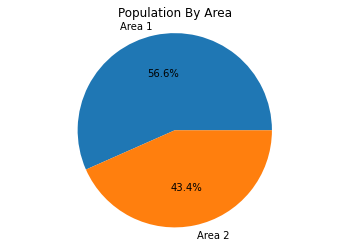

In [23]:
# Make pie chart from summary table 
Populations = [5029963,3852227]

my_labels = 'Area 1','Area 2'
plt.pie(Populations,labels=my_labels,autopct='%1.1f%%')
plt.title('Population By Area')
plt.axis('equal')
plt.show()

#Show this next to a map of NJ with Groups 1 & 2 Sectioned out. 

In [24]:
# Get Covid Data in Here 

#BEGINNING OF CODE TAKEN FROM DASA 

#API from CDC; shows # of NJ cases by county for June 2021

url = "https://data.cdc.gov/resource/n8mc-b4w4.json?res_state=NJ&case_month=2021-06&$limit=20000"

#how to filter for NJ first, date, and then 20000 cases?


In [25]:
response = requests.get(url)
print(response.url)

https://data.cdc.gov/resource/n8mc-b4w4.json?res_state=NJ&case_month=2021-06&$limit=20000


In [26]:
data = response.json()
# Use json.dumps to print the json
#print(json.dumps(data, indent=4, sort_keys=True))

#print data frame

df = pd.DataFrame(data)
df

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,case_onset_interval,underlying_conditions_yn
0,2021-06,NJ,34,CAPE MAY,34009,NA,NA,NA,NA,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN,NaN
1,2021-06,NJ,34,CAPE MAY,34009,NA,NA,NA,NA,Missing,Missing,Probable Case,Symptomatic,Yes,Missing,No,0.0,NaN
2,2021-06,NJ,34,CAPE MAY,34009,NA,NA,NA,NA,Missing,Missing,Probable Case,Symptomatic,No,Missing,No,0.0,NaN
3,2021-06,NJ,34,CAPE MAY,34009,NA,NA,NA,NA,Missing,Missing,Probable Case,Symptomatic,No,Missing,No,0.0,NaN
4,2021-06,NJ,34,CAPE MAY,34009,NA,NA,NA,NA,Missing,Missing,Probable Case,Symptomatic,No,Missing,No,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8783,2021-06,NJ,34,NA,NA,50 to 64 years,NA,NA,NA,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN,NaN
8784,2021-06,NJ,34,NA,NA,50 to 64 years,NA,NA,NA,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN,NaN
8785,2021-06,NJ,34,NA,NA,50 to 64 years,NA,NA,NA,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN,NaN
8786,2021-06,NJ,34,NA,NA,50 to 64 years,NA,NA,NA,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN,NaN


In [27]:
#Total # of cases

num_cases = df["res_state"].count()

df_total_cases = pd.DataFrame({"Total # of NJ cases in June 2021":[num_cases]})
df_total_cases

,Total # of NJ cases in June 2021
0,8788


In [28]:
total_case_df = pd.read_csv("covid_confirmed_usafacts.csv")
total_case_df

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11,2021-07-12,2021-07-13,2021-07-14,2021-07-15
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,7262,7277,7277,7294,7299,7299,7306,7306,7320,7329
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,22043,22154,22154,22220,22267,22267,22337,22337,22464,22556
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,2347,2354,2354,2361,2365,2365,2367,2367,2373,2377
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,2693,2699,2699,2699,2702,2702,2704,2704,2708,2713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,4801,4805,4820,4820,4833,4833,4853,4859,4869,4876
3189,56039,Teton County,WY,56,0,0,0,0,0,0,...,3804,3805,3807,3807,3816,3816,3824,3826,3831,3834
3190,56041,Uinta County,WY,56,0,0,0,0,0,0,...,2325,2327,2328,2328,2329,2329,2329,2330,2332,2333
3191,56043,Washakie County,WY,56,0,0,0,0,0,0,...,927,927,929,929,929,929,929,929,929,932


In [29]:
total_case_df_revised = total_case_df[["County Name", "countyFIPS", "State","2021-07-15"]]

total_case_df_revised = total_case_df_revised.loc[total_case_df_revised["State"] == "NJ", :]
total_case_df_revised = total_case_df_revised.groupby(['County Name', 'countyFIPS'], as_index=False).sum()
total_case_df_revised = total_case_df_revised.rename(columns = {'County Name' : 'County', 'countyFIPS' : 'County_Num', '7/15/2021' : 'Total Cumulative Cases as of 7/15/21'})
#total_case_df_revised = total_case_df_revised.sort_values('Total Cumulative Cases as of 7/15/21',ascending=False)
#total_case_df_revised = total_case_df_revised.drop(18).reset_index(drop=True)
total_case_df_revised['County_Num'] = total_case_df_revised['County_Num'].astype(str)
total_case_df_revised

,County,County_Num,2021-07-15
0,Atlantic County,34001,31812
1,Bergen County,34003,105384
2,Burlington County,34005,44598
3,Camden County,34007,56208
4,Cape May County,34009,9318
5,Cumberland County,34011,17292
6,Essex County,34013,94829
7,Gloucester County,34015,30826
8,Hudson County,34017,88604
9,Hunterdon County,34019,9945


In [30]:
# NOW WE NEED TO SEPARATE BY GROUPS AGAIN & Get RID OF UNALLOCATED 

# Collect a list of sightings seen in the US
total_case_df_revised.insert(2,"Group",[
    "2",
    "1",
    "2",
    "2",
    "2",
    "2",
    "1",
    "2",
    "1",
    "2",
    "2",
    "1",
    "1",
    "2",
    "2",
    "1",
    "2",
    "2",
    "0",
    "2",
    "1",
    "2",
   ], True)
total_case_df_revised




,County,County_Num,Group,2021-07-15
0,Atlantic County,34001,2,31812
1,Bergen County,34003,1,105384
2,Burlington County,34005,2,44598
3,Camden County,34007,2,56208
4,Cape May County,34009,2,9318
5,Cumberland County,34011,2,17292
6,Essex County,34013,1,94829
7,Gloucester County,34015,2,30826
8,Hudson County,34017,1,88604
9,Hunterdon County,34019,2,9945


In [31]:
#MAke Df of just the group 2 counties & Cases 
group1_cases_df = total_case_df_revised.loc[total_case_df_revised["Group"] == "1",:]
group1_cases_df

#dive deeper into the Group 1 data by making a Pie chart of the cases in each county. 

,County,County_Num,Group,2021-07-15
1,Bergen County,34003,1,105384
6,Essex County,34013,1,94829
8,Hudson County,34017,1,88604
11,Middlesex County,34023,1,92933
12,Monmouth County,34025,1,76687
15,Passaic County,34031,1,73638
20,Union County,34039,1,72046


In [41]:
group1_clean_cases_df = group1_cases_df[["2021-07-15"]]
group1_clean_cases_df

#group1_clean_cases_df["2021-07-15"] = pd.to_numeric(group2_clean_df["2021-07-15"])

#group1_clean_cases_df.sum(axis=1, skipna=None, level=None, numeric_only=None, min_count=0)

,2021-07-15
1,105384
6,94829
8,88604
11,92933
12,76687
15,73638
20,72046


In [43]:
group1_clean_cases_df = group1_cases_df[["2021-07-15"]]
group1_clean_cases_df



,2021-07-15
1,105384
6,94829
8,88604
11,92933
12,76687
15,73638
20,72046


In [46]:
group1_clean_cases_df["2021-07-15"] = pd.to_numeric(group1_clean_cases_df["2021-07-15"])

group1_clean_cases_df.sum(axis=0, skipna=None, level=None, numeric_only=None, min_count=0)

<ipython-input-46-80734b241ebd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1_clean_cases_df["2021-07-15"] = pd.to_numeric(group1_clean_cases_df["2021-07-15"])


2021-07-15    604121
dtype: int64

In [48]:
#MAke Df of just the group 2 counties & Cases 
group2_cases_df = total_case_df_revised.loc[total_case_df_revised["Group"] == "2",:]
group2_cases_df




,County,County_Num,Group,2021-07-15
0,Atlantic County,34001,2,31812
2,Burlington County,34005,2,44598
3,Camden County,34007,2,56208
4,Cape May County,34009,2,9318
5,Cumberland County,34011,2,17292
7,Gloucester County,34015,2,30826
9,Hunterdon County,34019,2,9945
10,Mercer County,34021,2,34270
13,Morris County,34027,2,50596
14,Ocean County,34029,2,76893


In [49]:
# Calc totals & make a pie chart comparing them. 

group2_clean_cases_df = group2_cases_df[["2021-07-15"]]
group2_clean_cases_df


,2021-07-15
0,31812
2,44598
3,56208
4,9318
5,17292
7,30826
9,9945
10,34270
13,50596
14,76893


In [50]:
group2_clean_cases_df["2021-07-15"] = pd.to_numeric(group2_clean_cases_df["2021-07-15"])

group2_clean_cases_df.sum(axis=0, skipna=None, level=None, numeric_only=None, min_count=0)

<ipython-input-50-8bfab1ad328d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group2_clean_cases_df["2021-07-15"] = pd.to_numeric(group2_clean_cases_df["2021-07-15"])


2021-07-15    422510
dtype: int64

In [51]:
# Summary Table 

#Make a summary table 
total_covid_dicts = [{"Group 1": "604121", "Group 2": "422510", "Total": "1026631"}]

totals_covid_df = pd.DataFrame(total_covid_dicts)
totals_covid_df

,Group 1,Group 2,Total
0,604121,422510,1026631


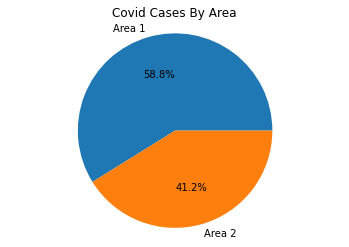

In [52]:
# Make pie chart from summary table 
Cases = [604121,422510]

my_labels = 'Area 1','Area 2'
plt.pie(Cases,labels=my_labels,autopct='%1.1f%%')
plt.title('Covid Cases By Area')
plt.axis('equal')
plt.show()
